# Tratando dados de transações

## Assistir course de time series do kaggle

## Etapas

- Ler os dados
- Analise dos dados
- Remover colunas menos importantes, filtrar soja
- Verificar e tratar valores nulos
- Verificar e tratar outliers
- Relação de data e seller id
- Tratamento para unificar data e criar features unificadas
- Separar por seller id
- Expandir datas
- Tratamento de valores nulos
- Criar features com os dados do seller id

## Features interessantes para o seller id

Features que já possuimos:
- Data
- Price por data
- Amount por data
Features que iremos criar:
- Preço medio diario
- Quantidade media diaria
- Maior preço vendido
- Menor preço vendido
- Maior quantidade vendida
- Menor quantidade vendida
- Quantidade de transações por dia
- Se a quantidade do menor valor é maior que a quantidade do maior valor(Se vendeu mais com preço menor)
- Dia da semana
- Se transacionou ou não(0 ou 1)

## Lendo dados

In [2]:
import pandas as pd

In [3]:
url = 'C:/workspace/Desafio Grão Direto IA/Data/transações-desafio.xlsx'

transacoes = pd.read_excel(url)
transacoes

,Date,Time,Company,Seller ID,Buyer ID,Price,Amount,Product,origin_city,origin_state
0,2024-11-04,14:21:17,Polaris,100000060,200000027,124.447569,2290.909287,Soja,Porto Velho,RO
1,2024-11-04,12:11:56,Polaris,100002271,200000180,119.524125,2092.071936,Soja,Uberlândia,MG
2,2024-11-04,12:20:33,Polaris,100002332,200000199,121.641336,25427.175976,Soja,Terra Nova do Norte,MT
3,2024-11-04,11:32:09,Lunarix,100002035,200000020,119.025800,5074.951735,Soja,Barcarena,PA
4,2024-11-04,15:16:05,Polaris,100002339,200000208,114.041989,9691.241875,Soja,Tasso Fragoso,MA
...,...,...,...,...,...,...,...,...,...,...
9508,2024-01-03,12:15:56,Lunarix,100000094,200000011,107.246483,2009.361816,Soja,Porto Velho,RO
9509,2024-01-03,13:26:05,Lunarix,100000314,200000009,112.163921,962.326195,Soja,Boa Vista,RR
9510,2024-01-03,11:37:41,Polaris,100000865,200000027,137.791300,107351.263706,Soja,Rondonópolis,MT
9511,2024-01-03,14:24:58,Polaris,100000866,200000133,127.947271,1353.466033,Soja,Rondonópolis,MT


## Filtrando por soja

In [4]:
transacoes_filtradas = transacoes[transacoes['Product'] == 'Soja']

## Dropando colunas

In [5]:
transacoes_filtradas = transacoes_filtradas[['Date','Seller ID','Price','Amount']]
transacoes_filtradas

,Date,Seller ID,Price,Amount
0,2024-11-04,100000060,124.447569,2290.909287
1,2024-11-04,100002271,119.524125,2092.071936
2,2024-11-04,100002332,121.641336,25427.175976
3,2024-11-04,100002035,119.025800,5074.951735
4,2024-11-04,100002339,114.041989,9691.241875
...,...,...,...,...
9508,2024-01-03,100000094,107.246483,2009.361816
9509,2024-01-03,100000314,112.163921,962.326195
9510,2024-01-03,100000865,137.791300,107351.263706
9511,2024-01-03,100000866,127.947271,1353.466033


## Tratando valores nulos

In [6]:
transacoes_filtradas.isnull().sum()

Date         0
Seller ID    0
Price        0
Amount       1
dtype: int64

In [7]:
transacoes_filtradas['Amount'] = transacoes_filtradas['Amount'].fillna(transacoes_filtradas['Amount'].median())
transacoes_filtradas.isnull().sum()

Date         0
Seller ID    0
Price        0
Amount       0
dtype: int64

## Tratando outliers

In [8]:
import seaborn as sns

<Axes: ylabel='Price'>

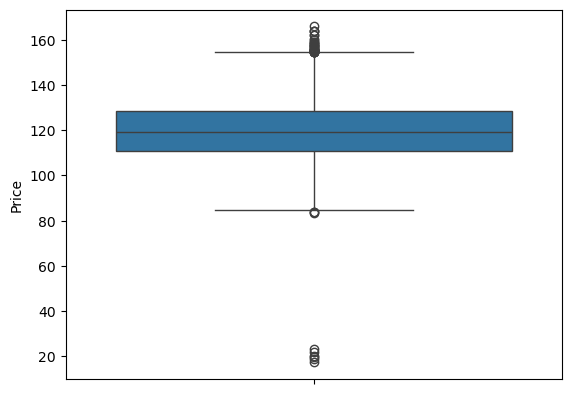

In [10]:
sns.boxplot(data=transacoes_filtradas,y=transacoes_filtradas['Price'])

# Separando por seller id